In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
def gaussian(x,y,sigma):
    return (math.exp(-(x**2 + y**2)/(2*sigma**2)))

def convolution(image, sigma):
    temp = 0
    final_image = np.zeros(image.shape)
    if (int(6*sigma)%2)==0:
        filter_size = int(6*sigma)+1
    else:
        filter_size = int(6*sigma)+2
    offset = int(filter_size)//2
    shap = (image.shape[0]+2*offset, image.shape[1]+2*offset)
    filter_ = np.zeros((filter_size, filter_size))
    for i in range(filter_size):
        for j in range(filter_size):
            filter_[i][j] = gaussian(i-offset, j-offset, sigma)
    sum_filter = 0
    for i in range(filter_size):
        for j in range(filter_size):
            sum_filter+=filter_[i][j]
    filter_=filter_/(sum_filter)
    temp = 0
    img = np.zeros(shap)
    for i in range(offset,shap[0]-offset):
        for j in range(offset, shap[1]-offset):
            img[i][j]  = image[i-offset][j-offset]
    for i1 in range(offset,shap[0]-offset):
        for i2 in range(offset,shap[1]-offset):
            for i in range(filter_size):
                for j in range(filter_size):
                    temp+= img[i1-offset+i][i2-offset+j]*filter_[i][j]
            final_image[i1-offset][i2-offset] = temp
            temp = 0 
    return final_image

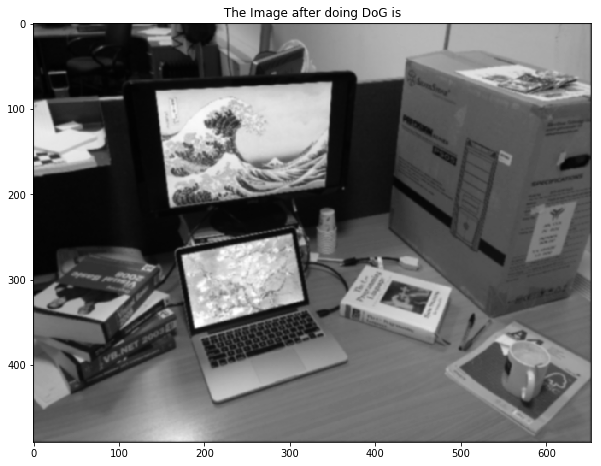

In [216]:
image = cv.imread('img1.jpg')
image = cv.resize(image,None, fx = 0.20, fy = 0.20, interpolation = cv.INTER_CUBIC)
image = cv.cvtColor(image,cv.COLOR_BGR2GRAY)
image_dog = convolution(image,1)
plt.figure(figsize = (10,10))
plt.title(' The Image after doing DoG is ')
plt.imshow(image_dog, cmap = 'gray')
plt.show()

In [5]:
sigma = 1/(2**0.5)
k = 2**0.5
octave1 = []
octave2 = []
octave3 = []
octave4 = []
temp = sigma
for i in range(5):
    octave1.append(temp)
    temp = temp*k
    
temp = octave1[2]
for i in range(5):
    octave2.append(temp)
    temp = temp*k
temp = octave2[2]
for i in range(5):
    octave3.append(temp)
    temp = temp*k
temp = octave3[2]
for i in range(5):
    octave4.append(temp)
    temp = temp*k

octaves = [octave1, octave2, octave3, octave4]

In [328]:
image_1 = cv.imread('3_2.jpg')
image_1 = cv.resize(image_1,None, fx = 0.2, fy =  0.2, interpolation = cv.INTER_CUBIC)
image_1 = cv.cvtColor(image_1,cv.COLOR_BGR2GRAY)
image_1 = convolution(image_1, 0.5)

In [329]:
image_generated = []
for i in range(1,5):
    image_generated.append([])
    for j in octaves[i-1]:
        img_ = convolution(image_1, j)
        image_generated[i-1].append(img_)
    image_1 = cv.resize(image_1,None, fx = 0.5, fy =  0.5, interpolation = cv.INTER_CUBIC)

In [330]:
def keypoint(image_1, image_2, image_3):
    temp = image_1.shape
    keypt = []
    for i in range(1, temp[0]-1):
        for j in range(1, temp[1]-1):
            min1=min(image_2[i-1,j-1], image_2[i-1,j], image_2[i-1,j+1], image_2[i,j-1], image_2[i,j+1],image_2[i+1,j-1],image_2[i+1,j],image_2[i+1][j+1])
            max1=max(image_2[i-1,j-1], image_2[i-1,j], image_2[i-1,j+1], image_2[i,j-1], image_2[i,j+1],image_2[i+1,j-1],image_2[i+1,j],image_2[i+1][j+1])
            min2=min(image_3[i,j],image_3[i-1,j-1], image_3[i-1,j], image_3[i-1,j+1], image_3[i,j-1], image_3[i,j+1],image_3[i+1,j-1],image_3[i+1,j],image_3[i+1][j+1])
            max2=max(image_3[i,j],image_3[i-1,j-1], image_3[i-1,j], image_3[i-1,j+1], image_3[i,j-1], image_3[i,j+1],image_3[i+1,j-1],image_3[i+1,j],image_3[i+1][j+1])
            min3=min(image_1[i,j],image_1[i-1,j-1], image_1[i-1,j], image_1[i-1,j+1], image_1[i,j-1], image_1[i,j+1],image_1[i+1,j-1],image_1[i+1,j],image_1[i+1][j+1])
            max3=max(image_1[i,j],image_1[i-1,j-1], image_1[i-1,j], image_1[i-1,j+1], image_1[i,j-1], image_1[i,j+1],image_1[i+1,j-1],image_1[i+1,j],image_1[i+1][j+1])
            ## These both conditions are mutually exclusive cases
            if image_2[i,j] <=min(min1, min2, min3):
                keypt.append([i,j])
            if image_2[i,j]>=max(max1, max2, max3):
                keypt.append([i,j])
    return keypt

In [ ]:
def diff_of_gauss(image1, image2):
    image3 = np.zeros((image1.shape[0],image1.shape[1]))
    for i in range(image1.shape[0]):
        for j in range(image1.shape[1]):
            image3[i,j] = image1[i,j]-image2[i,j]
    return image3

In [ ]:
image_generated_dog = []
for i in range(len(image_generated)):
    image_generated_dog.append([])
    for j in range(len(image_generated[i])):
        try:
            temp = diff_of_gauss(image_generated[i][j+1], image_generated[i][j]) ## The One in i,j+1 has higher sigma value
            image_generated_dog[i].append(temp)
        except:
            continue

In [ ]:
kplist= [[],[],[],[]]

def keypoint_top_bottom(image_1, image_2):
    temp = image_1.shape
    keypt = []
    for i in range(1, temp[0]-1):
        for j in range(1, temp[1]-1):
            min1=min(image_2[i,j],image_2[i-1,j-1], image_2[i-1,j], image_2[i-1,j+1], image_2[i,j-1], image_2[i,j+1],image_2[i+1,j-1],image_2[i+1,j],image_2[i+1][j+1])
            max1=max(image_2[i,j],image_2[i-1,j-1], image_2[i-1,j], image_2[i-1,j+1], image_2[i,j-1], image_2[i,j+1],image_2[i+1,j-1],image_2[i+1,j],image_2[i+1][j+1])
            min2=min(image_1[i-1,j-1], image_1[i-1,j], image_1[i-1,j+1], image_1[i,j-1], image_1[i,j+1],image_1[i+1,j-1],image_1[i+1,j],image_1[i+1][j+1])
            max2=max(image_1[i-1,j-1], image_1[i-1,j], image_1[i-1,j+1], image_1[i,j-1], image_1[i,j+1],image_1[i+1,j-1],image_1[i+1,j],image_1[i+1][j+1])
            if(image_1[i,j]<=min(min1,min2,max1,min2)):
                keypt.append([i,j])
            if(image_1[i,j]>=max(min1,min2,max1,max2)):
                keypt.append([i,j])
    return keypt

for i in range(len(image_generated_dog)):
    kplist[i].append(keypoint_top_bottom(image_generated_dog[i][0],image_generated_dog[i][1]))
    
for i in range(len(image_generated_dog)):
    for j in range(len(image_generated_dog[i])):
        try:
            kplist[i].append(keypoint(image_generated_dog[i][j],image_generated_dog[i][j+1],image_generated_dog[i][j+2]))
        except:
            continue

for i in range(len(image_generated_dog)):
    kplist[i].append(keypoint_top_bottom(image_generated_dog[i][2],image_generated_dog[i][3]))

In [ ]:
max(image_generated_dog[0][0][0])

## Dominant Orientation Assignment

In [ ]:
for i in range(1):
    for j in range(1,len(image_generated[0])-1):
        plt.figure(figsize = (10,10))
        plt.title('These are the keypoints found for image '+str(j) +' of Octave 1 - No of keypoints = '+str(len(kplist[i][j])))
        plt.scatter([val[1] for val in kplist[i][j]],[val[0] for val in kplist[i][j]],color = 'red', s= 0.5)
        plt.imshow(image_generated[i][j], cmap = 'gray')

## Orientation Assignment

# Refinement Left in the below orientation assignment 
## 1. Try to ignore it for the corner cases

In [13]:
## Octave 1 under consideration for performing Orientation Assignment

import random as rd


def orientation_assignment(octave_number, image_number):
    hist = {}
    image = image_generated[octave_number-1][image_number-1]
    sigma = octaves[octave_number-1][image_number-1]*1.5
    image = convolution(image, sigma)
    index1 = octave_number - 1
    index2 = image_number - 1
    x__ = image.shape[0]
    y__ = image.shape[1]
    angle = {}
    magnitude = {}
    for i in range(len(kplist[index1][index2])):
        x,y = kplist[index1][index2][i][0],kplist[index1][index2][i][1]
        if x+8<=x__ and y+8<=y__ and x-8>=0 and y-8>=0:
            for i1 in range(-8,9):
                for j1 in range(-8,9):
                        try:
                            xcoord = image[x+i1,y+j1+1]-image[x+i1,y+j1-1]
                            ycoord = image[x+1+i1,y+j1]-image[x-1+i1,y+j1]
                            if xcoord<0 and ycoord>0:
                                angle[(x+i1,y+j1)] = 180/math.pi*math.atan((image[x+1+i1, y+j1] - image[x-1+i1,y+j1])/(image[x+i1,y+1+j1] - image[x+i1,y+j1-1])) + 180
                            if xcoord>0 and ycoord>0:
                                angle[(x+i1,y+j1)] = 180/math.pi*math.atan((image[x+1+i1, y+j1] - image[x-1+i1,y+j1])/image[x+i1,y+1+j1] - image[x+i1,y+j1-1])
                            if xcoord>0 and ycoord<0:
                                angle[(x+i1,y+j1)] = 180/math.pi*math.atan((image[x+1+i1, y+j1] - image[x-1+i1,y+j1])/(image[x+i1,y+1+j1] - image[x+i1,y+j1-1])) + 360
                            if xcoord<0 and ycoord<0:
                                angle[(x+i1,y+j1)] = 180/math.pi*math.atan((image[x+1+i1, y+j1] - image[x-1+i1,y+j1])/(image[x+i1,y+1+j1] - image[x+i1,y+j1-1])) + 180
                            if xcoord ==0 and ycoord!=0:
                                if ycoord<0:
                                    angle[(x+i1,y+j1)] = 270
                                else:
                                    angle[(x+i1,y+j1)] = 90
                            if xcoord!=0 and ycoord ==0:
                                if xcoord<0:
                                    angle[(x+i1,y+j1)] = +180
                                if xcoord>0:
                                    angle[(x+i1,y+j1)] = 0
                            magnitude[(x+i1,y+j1)] = ((image[x+i1+1,y+j1]-image[x-1+i1,y+j1])**2 + (image[x+i1,y+j1+1] - image[x+i1,y+j1-1])**2)**0.5
                        except:
                            continue
        else:
            continue
        hist[(x,y)] = [ [] for j_ in range(36)]
        for i_ in angle:
            temp = angle[i_]//(10)
            hist[(x,y)][(int(temp))].append(magnitude[i_])
        angle = {}

    for elem in hist:
        for j in range(len(hist[elem])):
            hist[elem][j] = sum(hist[elem][j])
    max_list = {}
    for i in hist:
        max_hist = [0,-1]
        for j in range(len(hist[i])):
            if hist[i][j]>max_hist[1]:
                max_hist = [j,hist[i][j]]

        max_list[i] = [max_hist]
        for j in range(len(hist[i])):
            if hist[i][j]>=0.8*max_hist[1] and [j,hist[i][j]] not in max_list[i]:
                max_list[i].append([j,hist[i][j]])
    #print(len(max_list))
    return max_list

In [14]:
orientation_final = {}
for i in range(1,len(image_generated_dog)+1):
    for j in range(1,len(image_generated_dog[0])+1):
        print(i,j)
        orientation_final[(i,j)] = orientation_assignment(i,j)
        print(len(orientation_final[(i,j)]))

1 1
26946
1 2
2687
1 3
1505
1 4
9149
2 1
2166
2 2
146
2 3
123
2 4
560
3 1
130
3 2
8
3 3
13
3 4
29
4 1
7
4 2
1
4 3
1
4 4
4


In [16]:
for i in range(len(kplist)):
    for j in range(len(kplist[0])):
        print(len(kplist[i][j]))
for i in range(1,len(image_generated_dog)+1):
    for j in range(1,len(image_generated_dog[0])+1):
        if j!=1 and j!=4:
            print(len(orientation_final[(i,j)]))

27921
2811
1571
9387
2316
156
142
604
155
11
16
39
13
1
1
4
2687
1505
146
123
8
13
1
1


## Orientation Assignment to the corresponsing images in the Gaussian Scale Space
## Plot the Gaussian Images and the corresponding Keypoints
## Do only for the 2nd 3rd images of every octave :) 

In [60]:
def sift_descriptor(image, orientation):
    
    ## Computing the orientations --- 
    
    total_bin = {}
    hist = {}
    for i in orientation:
        magnitude = {}
        angle = {}
        for j in range(i[0]-8,i[0]+9):
            for k in range(i[1]-8,i[1]+9):
                if j!=i[0] and k!=i[1]:
                    try:
                        xcoord = image[j,k+1]-image[j,k-1]
                        ycoord = image[j+1,k]-image[j-1,k]

                        if xcoord<0 and ycoord>0:
                            angle[(j,k)] = 180/math.pi*math.atan((image[j+1,k] - image[j-1,k])/(image[j,k+1] - image[j,k-1])) + 180

                        if xcoord>0 and ycoord>0:
                            angle[(j,k)] = 180/math.pi*math.atan((image[j+1,k] - image[j-1,k])/(image[j,k+1] - image[j,k-1])) 

                        if xcoord<0 and ycoord<0:
                            angle[(j,k)] = 180/math.pi*math.atan((image[j+1,k] - image[j-1,k])/(image[j,k+1] - image[j,k-1]))  + 180

                        if xcoord>0 and ycoord<0:
                            angle[(j,k)] = 180/math.pi*math.atan((image[j+1,k] - image[j-1,k])/(image[j,k+1] - image[j,k-1]))  + 360

                        if xcoord ==0 and ycoord!=0:
                            if ycoord<0:
                                angle[(j,k)] = 270
                            else:
                                angle[(j,k)] = 90

                        if xcoord!=0 and ycoord ==0:
                            if xcoord<0:
                                angle[(j,k)] = 180
                            if xcoord>0:
                                angle[(j,k)] = 0
                        magnitude[(j,k)] = ((image[j+1,k]-image[j-1,k])**2 + (image[j,k+1] - image[j,k-1])**2)**0.5
                    except:
                        continue
                else:
                    continue
        sigma = 8 
        
        # One half of the descriptor window of 16,
        # Taking a 17 x 17 neighborhood
        gauss_8 = np.zeros((17,17))
        gauss_sum = 0
        for i_ in range(17):
            for j in range(17):
                gauss_8[i_][j] = gaussian(i_-8,j-8,sigma)
                gauss_sum+=gauss_8[i_][j]
        gauss_8 = gauss_8/gauss_sum
        
        ## Weighing the image before making the orientations
        
        for x in range(i[0]-8,i[0]+8):
            for y in range(i[1]+8,i[1]+8):
                magnitude[(x,y)]*=gauss_8[x-i[0]+8][y+8-i[1]]
                
        bins = [[[] for ___ in range(8)] for __ in range(16)]
        cnt = 0
        try:
            for i3 in range(-8,-4,1):
                for j in range(-8,-4,1):
                    #print(angle.keys())
                    temp = angle[(i[0]+i3,i[1]+j)]//45
                    temp = int(temp)
                    bins[0][temp].append(magnitude[(i[0]+i3,i[1]+j)])
                for j in range(-4,0,1):
                    temp = angle[(i[0]+i3,i[1]+j)]//45
                    temp = int(temp)
                    bins[1][temp].append(magnitude[(i[0]+i3,i[1]+j)])
                for j in range(1,5,1):
                    temp = angle[(i[0]+i3,i[1]+j)]//45
                    temp = int(temp)
                    bins[2][temp].append(magnitude[(i[0]+i3,i[1]+j)])
                for j in range(5,9,1):
                    #print(i[0]+i3,i[1]+j)
                    temp = angle[(i[0]+i3,i[1]+j)]//45
                    temp = int(temp)
                    bins[3][temp].append(magnitude[(i[0]+i3,i[1]+j)])


            for i3 in range(-4,0,1):
                for j in range(-8,-4,1):
                    #print(i3,j)
                    temp = angle[(i[0]+i3,i[1]+j)]//45
                    temp = int(temp)
                    bins[4][temp].append(magnitude[(i[0]+i3,i[1]+j)])
                for j in range(-4,0,1):
                    temp = angle[(i[0]+i3,i[1]+j)]//45
                    temp = int(temp)
                    bins[5][temp].append(magnitude[(i[0]+i3,i[1]+j)])
                for j in range(1,5,1):
                    temp = angle[(i[0]+i3,i[1]+j)]//45
                    temp = int(temp)
                    bins[6][temp].append(magnitude[(i[0]+i3,i[1]+j)])
                for j in range(5,9,1):
                    temp = angle[(i[0]+i3,i[1]+j)]//45
                    temp = int(temp)
                    bins[7][temp].append(magnitude[(i[0]+i3,i[1]+j)])

            for i3 in range(1,5,1):
                for j in range(-8,-4,1):
                    temp = angle[(i[0]+i3,i[1]+j)]//45
                    temp = int(temp)
                    bins[8][temp].append(magnitude[(i[0]+i3,i[1]+j)])
                for j in range(-4,0,1):
                    temp = angle[(i[0]+i3,i[1]+j)]//45
                    temp = int(temp)
                    bins[9][temp].append(magnitude[(i[0]+i3,i[1]+j)])
                for j in range(1,5,1):
                    temp = angle[(i[0]+i3,i[1]+j)]//45
                    temp = int(temp)
                    bins[10][temp].append(magnitude[(i[0]+i3,i[1]+j)])
                for j in range(5,9,1):
                    temp = angle[(i[0]+i3,i[1]+j)]//45
                    temp = int(temp)
                    bins[11][temp].append(magnitude[(i[0]+i3,i[1]+j)])

            for i3 in range(5,9,1):
                for j in range(-8,-4,1):
                    temp = angle[(i[0]+i3,i[1]+j)]//45
                    temp = int(temp)
                    bins[12][temp].append(magnitude[(i[0]+i3,i[1]+j)])
                for j in range(-4,0,1):
                    temp = angle[(i[0]+i3,i[1]+j)]//45
                    temp = int(temp)
                    bins[13][temp].append(magnitude[(i[0]+i3,i[1]+j)])
                for j in range(1,5,1):
                    temp = angle[(i[0]+i3,i[1]+j)]//45
                    temp = int(temp)
                    bins[14][temp].append(magnitude[(i[0]+i3,i[1]+j)])
                for j in range(5,9,1):
                    temp = angle[(i[0]+i3,i[1]+j)]//45
                    temp = int(temp)
                    bins[15][temp].append(magnitude[(i[0]+i3,i[1]+j)])  
        except:
            continue
        total_bin[(i[0],i[1])] = bins
        del angle 
        del magnitude
    return total_bin
                

In [57]:
temp = orientation_assignment(2,2)
#a = sift_descriptor(image_generated[2][2], orientation_final[(3,3)])

In [62]:
a = sift_descriptor(image_generated[2][2], orientation_final[(3,3)])
print(image_generated[2][2].shape)


(122, 163)


{(19,
  15): [[[1.6820646127181145,
    1.3192593360423017,
    0.9747588489383149,
    0.6601004065992523],
   [2.10044042242553,
    1.7601335360542072,
    1.4481677120451477,
    1.1794889083211384,
    2.85226352476852,
    2.5323827800703884,
    2.238346591384431,
    1.9802029576517857,
    3.860438003957921,
    3.5450621067569874,
    3.246423928893274,
    2.9720793745224947],
   [],
   [],
   [],
   [],
   [],
   []], [[0.38829332924759674],
   [0.1857795764050554, 0.9678143315676667, 1.7643261778852357],
   [0.8206892612535747,
    0.7468484373089169,
    0.7391355639640022,
    1.5913240375646407,
    1.4629562225728632,
    1.375895000033488,
    2.726915042915594,
    2.512396714017685,
    2.330885360097673,
    2.1815933754413503],
   [0.20420365410593871, 0.3630005347816223],
   [],
   [],
   [],
   []], [[],
   [],
   [1.2842351816372928,
    1.2577307353769491,
    1.2113783820793358,
    1.123796321692329,
    1.959655565143916,
    1.8751085039094046,
    1.77885

In [332]:
sift_final = {}
for i in range(4):
    for j in range(4):
        if j!=0 and j!=3:
            try:
                sift_final[(i,j)] = sift_descriptor(image_generated[i][j],orientation_final[i+1,j+1])
            except:
                continue

In [90]:
## Sending these keypoints back to the original image -- This was the entire idea of SIFT :)
image_shape = [(490,653),(245,326),(122,163),(61,82)]
image_transformations = {(245,326):{},(122,163):{},(61,82):{}}
for i in sift_final:
    if i[1]!=0 and i[1]!=3:
        if image_generated[i[0]][i[1]].shape[0]==245:
            for j in sift_final[i]:
                image_transformations[(245,326)][(j[0],j[1])] = (2*j[0],2*j[1])
        if image_generated[i[0]][i[1]].shape[0]==122:
            for j in sift_final[i]:
                image_transformations[(122,163)][(j[0],j[1])] = (4*j[0],4*j[1])
        if image_generated[i[0]][i[1]].shape[0]==61:
            for j in sift_final[i]:
                image_transformations[(61,82)][(j[0],j[1])] = (8*j[0],8*j[0])

[2, 2.7071067811865483] [5, 5.707106781186547]
[4, 3.0038053019082547] [10, 10.087155742747658]
[8, 7.82635182233307] [15, 14.015192246987793]
[10, 10.984807753012207] [20, 19.82635182233307]
[12, 11.015192246987793] [25, 25.17364817766693]
[14, 14.309016994374948] [30, 30.951056516295154]
[16, 16.70710678118655] [35, 35.707106781186546]


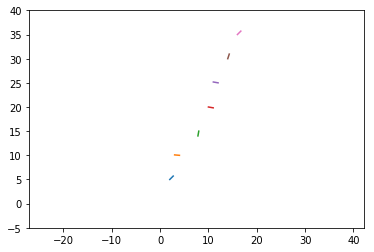

In [101]:
import numpy as np
import scipy as sp
import pylab as pl
import math

x = np.array([ 2, 4, 8, 10, 12, 14, 16])
y = np.array([ 5, 10, 15, 20, 25, 30, 35])
angles = np.array([45,275,190,100,280,18,45]) 

def draw_line(x,y,angle,length):
  cartesianAngleRadians = (450-angle)*math.pi/180.0
  terminus_x = x + length * math.cos(cartesianAngleRadians)
  terminus_y = y + length * math.sin(cartesianAngleRadians)
  pl.plot([x, terminus_x],[y,terminus_y])
  print ([x, terminus_x],[y,terminus_y])


pl.axis('equal')
pl.axis([-5,20,-5,40])
for i in range(0,len(x)):
  draw_line(x[i],y[i],angles[i],1)

pl.show()

In [256]:

for i in sift_final:
    for j in sift_final[i]:
        for k in range(len(sift_final[i][j])):
            try:
                tmp = sift_final[i][j][k]
                for elem in range(len(tmp)):
                    tmp[elem]  = sum(tmp[elem])
            except:
                continue
                

[[0,
  0,
  155.71396380882692,
  0,
  0.32238598832423465,
  1.044524652301084,
  48.200922935245664,
  0],
 [0, 4.853454604239572, 156.19860080376725, 0, 0, 0, 41.97568081605707, 0],
 [0,
  5.647393331608341,
  163.34852351614472,
  0,
  0,
  19.31865760066827,
  20.137713524680258,
  0],
 [0,
  66.73975013967159,
  98.78485717409356,
  0,
  0,
  18.8760174769468,
  18.19504916446083,
  0],
 [0, 7.4339071307518925, 115.63876966878226, 0, 0, 0, 41.481524993198626, 0],
 [0,
  0,
  108.96623754567666,
  0,
  0.3448495109547177,
  0.5747938428810359,
  45.250318791512214,
  0],
 [0,
  42.60705871286555,
  60.46667769259678,
  0,
  0,
  34.48161949137191,
  25.163443455414445,
  0],
 [0,
  51.279517542202655,
  53.43005127311903,
  0,
  0,
  12.87666163837856,
  46.89627635313959,
  0],
 [0, 0, 205.30597476118737, 0, 0, 0, 0, 0],
 [0, 41.38345876595932, 155.256911226379, 0, 0, 0, 0, 0],
 [0, 132.39848623050676, 58.325978948134775, 0, 0, 0, 0, 0],
 [0, 9.517575670720404, 169.04497973971232

In [257]:
final_descriptor = {}
for i in sift_final:
    for j in sift_final[i]:
        final_descriptor[j] = []
        for k in sift_final[i][j]:
            final_descriptor[j].append(k)

In [278]:
final_descriptor = {}
for i in sift_final:
    for j in sift_final[i]:
        final_descriptor[j] = []
        for k in sift_final[i][j]:
            final_descriptor[j].append(k)

# I am creating the final descriptor here
for i in final_descriptor:
    arr_ = np.asarray(final_descriptor[i])
    arr_ = arr_.flatten()
    final_descriptor[i] = arr_

# Now Normalise the Final Descriptor


In [352]:
final_descriptor = {}
for i in sift_final:
    for j in sift_final[i]:
        final_descriptor[j] = []
        for k in sift_final[i][j]:
            final_descriptor[j].append(k)
#print(final_descriptor)
# I am creating the final descriptor here
for i in final_descriptor:
    arr_ = np.asarray(final_descriptor[i])
    arr_ = arr_.flatten()
    final_descriptor[i] = arr_

# Now Normalise the Final Descriptor

for i in final_descriptor:
	sum_ = 0
	print(final_descriptor[i])
	for j in final_descriptor[i]:
		print(j,i)
		sum_+=j
	final_descriptor[i] = final_descriptor[i]/sum_

# Now set the maximum value of the descriptor to 0.2   # Again, normalize
for i in final_descriptor:
	max_ = 0
	for j in final_descriptor[i]:
		max_ = max(max_,j)
	for j in range(len(final_descriptor[i])):
		final_descriptor[i][j] = 0.2*final_descriptor[i][j]/(max_)
## Finally, normalise once more
for i in final_descriptor:
	sum_ = 0
	for j in final_descriptor[i]:
		sum_+=j
	final_descriptor[i] = final_descriptor[i]/sum_
# Now, final descriptor has all the keuypoints and the correspoinding 128 Dimensional Vector


[  0.           0.         155.71396381   0.           0.32238599
   1.04452465  48.20092294   0.           0.           4.8534546
 156.1986008    0.           0.           0.          41.97568082
   0.           0.           5.64739333 163.34852352   0.
   0.          19.3186576   20.13771352   0.           0.
  66.73975014  98.78485717   0.           0.          18.87601748
  18.19504916   0.           0.           7.43390713 115.63876967
   0.           0.           0.          41.48152499   0.
   0.           0.         108.96623755   0.           0.34484951
   0.57479384  45.25031879   0.           0.          42.60705871
  60.46667769   0.           0.          34.48161949  25.16344346
   0.           0.          51.27951754  53.43005127   0.
   0.          12.87666164  46.89627635   0.           0.
   0.         205.30597476   0.           0.           0.
   0.           0.           0.          41.38345877 155.25691123
   0.           0.           0.           0.           0.
 

0.0 (9, 559)
0.0 (9, 559)
0.0 (9, 559)
0.0 (9, 559)
0.0 (9, 559)
3.359669416219478 (9, 559)
14.298340371723995 (9, 559)
3.626510606551658 (9, 559)
0.0 (9, 559)
0.0 (9, 559)
0.0 (9, 559)
0.0 (9, 559)
0.0 (9, 559)
3.7280876347423906 (9, 559)
15.171531130851816 (9, 559)
18.00626730307795 (9, 559)
0.0 (9, 559)
0.0 (9, 559)
0.0 (9, 559)
0.0 (9, 559)
0.0 (9, 559)
0.0 (9, 559)
17.056881442504586 (9, 559)
22.68927149674178 (9, 559)
0.0 (9, 559)
0.0 (9, 559)
0.0 (9, 559)
0.0 (9, 559)
0.0 (9, 559)
0.0 (9, 559)
15.779549677776384 (9, 559)
21.904603687130148 (9, 559)
2.1525972526383605 (9, 559)
0.0 (9, 559)
0.0 (9, 559)
0.0 (9, 559)
0.0 (9, 559)
0.0 (9, 559)
1.7636470787986789 (9, 559)
18.642813327023838 (9, 559)
0.0 (9, 559)
0.0 (9, 559)
0.0 (9, 559)
0.0 (9, 559)
0.0 (9, 559)
7.23733536428742 (9, 559)
0.0 (9, 559)
121.23480794272412 (9, 559)
30.791824141909363 (9, 559)
0.0 (9, 559)
0.0 (9, 559)
0.0 (9, 559)
0.0 (9, 559)
0.0 (9, 559)
0.0 (9, 559)
112.16116681367495 (9, 559)
26.235886208676845 (9, 

0.0 (12, 62)
0.0 (12, 62)
12.656935869467477 (12, 62)
80.77644402067966 (12, 62)
0.0 (12, 62)
[ 12.03764714  54.38077744   3.44018804   4.37326703   7.68486095
   0.           0.           0.           0.           0.
   0.          13.65531994 121.11286569  30.22389255   0.
   0.           0.           0.           0.           0.
 168.56169006 106.00750258  28.55244166   0.           5.91109333
   0.           0.           4.81273698  82.6667679   19.48274334
   0.          91.50750304   0.           0.           0.
  31.63670958  21.25039379   0.           0.           0.
   0.           0.           0.           0.         380.20347967
   0.           0.           0.           0.          23.05246693
   6.86462283  14.4615198    5.91106817  24.90630242  37.84961434
   7.7503551   31.09211023   5.97693548   0.          44.7928868
  17.6835325    5.62067386  15.44740101  36.67328431   1.19973871
   0.           1.5401201   14.01118742  82.45648357   0.54303413
   0.66825904   0.     

34.1930006090903 (14, 364)
0.223599217541202 (14, 364)
0.0 (14, 364)
0.6585569468296679 (14, 364)
1.1763758106339395 (14, 364)
2.9429247151900415 (14, 364)
0.340159252637625 (14, 364)
2.7181712396944167 (14, 364)
6.364660045077617 (14, 364)
0.9108007527581794 (14, 364)
0.0 (14, 364)
8.334657410609644 (14, 364)
0.0 (14, 364)
0.0 (14, 364)
0.0 (14, 364)
0.0 (14, 364)
0.0 (14, 364)
0.0 (14, 364)
12.55287249816551 (14, 364)
0.0 (14, 364)
0.0 (14, 364)
0.0 (14, 364)
1.1995158736162899 (14, 364)
2.6971943514301646 (14, 364)
0.37913557008986026 (14, 364)
0.31752335628562556 (14, 364)
3.0924215871051515 (14, 364)
[1.97029620e+00 1.28925675e+00 1.01578961e+00 8.75395404e-02
 3.97394311e-01 1.16122401e+00 1.65291468e-01 6.43374379e-01
 1.04495729e+01 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 9.86835944e-01 5.52078890e+00
 7.11870206e+00 5.33008314e-01 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 3.92507866e-01 3.90758470e+00
 1.04584325e+01 0.000

0.0 (16, 620)
0.0 (16, 620)
0.0 (16, 620)
30.465883468867155 (16, 620)
3.793563976404603 (16, 620)
0.0 (16, 620)
8.034741359365082 (16, 620)
9.76492392213225 (16, 620)
0.0 (16, 620)
0.0 (16, 620)
36.2393443754768 (16, 620)
33.907345204426356 (16, 620)
0.0 (16, 620)
0.0 (16, 620)
16.35038344667682 (16, 620)
0.0 (16, 620)
0.0 (16, 620)
0.0 (16, 620)
11.509450453108261 (16, 620)
59.889693381439585 (16, 620)
0.0 (16, 620)
0.0 (16, 620)
12.448997989757268 (16, 620)
11.079505385094977 (16, 620)
0.0 (16, 620)
0.0 (16, 620)
44.258093038486436 (16, 620)
19.066216141445896 (16, 620)
0.0 (16, 620)
0.46981190061892625 (16, 620)
1.8129078669013285 (16, 620)
8.14684735094647 (16, 620)
4.935326659665012 (16, 620)
0.0 (16, 620)
5.437492202726138 (16, 620)
79.79443228122041 (16, 620)
0.0 (16, 620)
0.0 (16, 620)
2.120993414289521 (16, 620)
11.011605871617869 (16, 620)
0.0 (16, 620)
1.2561247352835494 (16, 620)
4.621194257671167 (16, 620)
1.30435923005315 (16, 620)
0.0 (16, 620)
0.0 (16, 620)
5.874214692

143.52134404263597 (20, 270)
0.0 (20, 270)
0.0 (20, 270)
0.0 (20, 270)
0.0 (20, 270)
104.51367085960987 (20, 270)
5.394635005451224 (20, 270)
0.0 (20, 270)
0.0 (20, 270)
148.38584528240557 (20, 270)
0.0 (20, 270)
0.0 (20, 270)
6.111362411707279 (20, 270)
82.40369519151275 (20, 270)
1.0112869290915907 (20, 270)
6.221562948929874 (20, 270)
124.20891336929834 (20, 270)
104.24349839355575 (20, 270)
0.0 (20, 270)
0.0 (20, 270)
0.0 (20, 270)
12.240268543127627 (20, 270)
18.46907360290504 (20, 270)
5.415621986165646 (20, 270)
179.6019663984965 (20, 270)
116.42850604536987 (20, 270)
0.0 (20, 270)
0.0 (20, 270)
0.0 (20, 270)
0.0 (20, 270)
0.0 (20, 270)
[4.71844526e+00 2.30194363e+00 2.88903910e+00 4.13812440e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 6.07158416e-01 1.68439349e+00 3.05172154e+00 1.46289629e+00
 0.00000000e+00 0.00000000e+00 7.10749609e-01 0.00000000e+00
 8.77293919e+00 3.66031519e+00 0.00000000e+00 5.48435964e-01
 0.00000000e+00 1.86134858e-01 0.00000000e+

0.09026885421512565 (23, 45)
0.5311227081829645 (23, 45)
0.0 (23, 45)
1.1685377700216284 (23, 45)
0.8766828721176985 (23, 45)
1.9700975744788454 (23, 45)
0.2732659163099463 (23, 45)
0.8700360994329159 (23, 45)
0.030531646542917696 (23, 45)
0.9425064991057475 (23, 45)
0.0 (23, 45)
0.6369026928839313 (23, 45)
1.6892721825871648 (23, 45)
0.14114942610459105 (23, 45)
3.520725261588526 (23, 45)
1.3618209163802257 (23, 45)
1.2331838838517277 (23, 45)
0.0 (23, 45)
0.0 (23, 45)
0.0 (23, 45)
1.4251699051687459 (23, 45)
1.555804952585491 (23, 45)
1.2725815076770988 (23, 45)
0.8413536624004851 (23, 45)
0.0 (23, 45)
[  0.           0.          55.9546327   27.63443139   8.86938628
   1.1067046    0.           0.           0.62684346  16.0470971
  18.24022703   0.           1.05241752   3.03488519   1.01999082
   0.           8.66790036   5.69388486   0.           0.
   0.           0.           0.         143.21509941   0.
   0.           0.           0.           0.           0.
 147.598095     8

0.0 (27, 123)
0.0 (27, 123)
0.0 (27, 123)
0.0 (27, 123)
0.0 (27, 123)
0.6691193315539002 (27, 123)
12.49262519672828 (27, 123)
12.671816691768766 (27, 123)
0.0 (27, 123)
1.045592126570801 (27, 123)
0.8581019964954003 (27, 123)
1.1275519929578877 (27, 123)
0.0 (27, 123)
0.0 (27, 123)
0.0 (27, 123)
0.0 (27, 123)
0.0 (27, 123)
0.0 (27, 123)
37.351422984151164 (27, 123)
0.0 (27, 123)
3.067083775831776 (27, 123)
4.676028686848863 (27, 123)
9.31128534467473 (27, 123)
2.419887032714737 (27, 123)
2.6386426735150486 (27, 123)
0.2987468571585901 (27, 123)
0.0 (27, 123)
0.0 (27, 123)
0.0 (27, 123)
0.0 (27, 123)
351.089220607884 (27, 123)
7.759166675161588 (27, 123)
0.0 (27, 123)
0.0 (27, 123)
0.0 (27, 123)
0.0 (27, 123)
0.0 (27, 123)
68.14291308076851 (27, 123)
12.580391582112412 (27, 123)
0.0 (27, 123)
0.0 (27, 123)
0.0 (27, 123)
0.0 (27, 123)
8.220786972450131 (27, 123)
33.130885263683936 (27, 123)
18.72057304984008 (27, 123)
0.0 (27, 123)
0.0 (27, 123)
0.0 (27, 123)
0.0 (27, 123)
15.8673794477

0.228107903751434 (30, 8)
0.0 (30, 8)
0.0 (30, 8)
1.1443375469533272 (30, 8)
0.0 (30, 8)
0.0 (30, 8)
1.2298941935306065 (30, 8)
0.8694969955080271 (30, 8)
4.242367412845503 (30, 8)
2.1323480969816644 (30, 8)
0.0 (30, 8)
0.0 (30, 8)
0.0 (30, 8)
0.5269905774281738 (30, 8)
0.672656702639993 (30, 8)
1.2326124916706578 (30, 8)
5.66199262350556 (30, 8)
1.9585182896188085 (30, 8)
0.0 (30, 8)
0.0 (30, 8)
296.5582179267354 (30, 8)
3.251428722680446 (30, 8)
0.0 (30, 8)
0.0 (30, 8)
0.0 (30, 8)
0.0 (30, 8)
0.0 (30, 8)
92.59822089290358 (30, 8)
1.1880910173895847 (30, 8)
0.7216375845357353 (30, 8)
1.8630992231520684 (30, 8)
1.235122942191371 (30, 8)
2.296328266358344 (30, 8)
0.0 (30, 8)
0.0 (30, 8)
1.7908414280172391 (30, 8)
0.0 (30, 8)
2.1937682789562856 (30, 8)
0.9413247551047684 (30, 8)
3.6803750169169462 (30, 8)
3.6601042309282956 (30, 8)
0.0 (30, 8)
0.0 (30, 8)
0.0 (30, 8)
0.0 (30, 8)
2.476931625163322 (30, 8)
4.629791430988683 (30, 8)
1.9189388299482735 (30, 8)
0.4161664004960268 (30, 8)
0.0 

783.261951267596 (31, 304)
0.0 (31, 304)
0.0 (31, 304)
0.0 (31, 304)
0.0 (31, 304)
0.0 (31, 304)
0.0 (31, 304)
47.16228450649164 (31, 304)
683.1079983711714 (31, 304)
0.0 (31, 304)
0.0 (31, 304)
0.0 (31, 304)
0.0 (31, 304)
0.0 (31, 304)
0.0 (31, 304)
0.0 (31, 304)
688.8246430429605 (31, 304)
0.0 (31, 304)
0.0 (31, 304)
0.0 (31, 304)
0.0 (31, 304)
0.0 (31, 304)
0.0 (31, 304)
0.0 (31, 304)
654.7971693317265 (31, 304)
0.0 (31, 304)
0.0 (31, 304)
0.0 (31, 304)
0.0 (31, 304)
0.0 (31, 304)
[0.00000000e+00 0.00000000e+00 8.15513684e+01 0.00000000e+00
 0.00000000e+00 1.92892924e+01 3.23337221e+01 0.00000000e+00
 0.00000000e+00 1.73371259e+01 5.32437980e+01 0.00000000e+00
 0.00000000e+00 5.07740158e+01 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.67372275e+01 5.06580085e+01 0.00000000e+00
 9.42377702e-01 1.36870257e+01 4.65560287e-01 0.00000000e+00
 0.00000000e+00 5.76366092e+01 1.70235873e+01 0.00000000e+00
 7.54581570e-01 1.20864033e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.08308

10.364884955214613 (33, 408)
0.0 (33, 408)
0.0 (33, 408)
89.58247128937593 (33, 408)
31.42505479171761 (33, 408)
0.0 (33, 408)
0.0 (33, 408)
2.30611268000325 (33, 408)
11.104386742436894 (33, 408)
0.0 (33, 408)
2.642637948749992 (33, 408)
74.92144924876226 (33, 408)
26.993801068337106 (33, 408)
0.0 (33, 408)
37.84923168154542 (33, 408)
20.16551195755178 (33, 408)
30.49661825656305 (33, 408)
0.0 (33, 408)
0.0 (33, 408)
0.0 (33, 408)
170.9848372369964 (33, 408)
28.78142195917663 (33, 408)
0.0 (33, 408)
0.0 (33, 408)
0.0 (33, 408)
0.9639143322458985 (33, 408)
1.1127481507620014 (33, 408)
28.51427819762951 (33, 408)
11.914606020426596 (33, 408)
1.0146203538495977 (33, 408)
0.4856572026251379 (33, 408)
0.0 (33, 408)
0.0 (33, 408)
0.4802838615182537 (33, 408)
0.20638320316430786 (33, 408)
27.632226346613827 (33, 408)
6.979345769032909 (33, 408)
0.0 (33, 408)
0.0 (33, 408)
0.0 (33, 408)
0.0 (33, 408)
1.2828047121554136 (33, 408)
0.0 (33, 408)
24.93916868176022 (33, 408)
16.793451387763277 (33

34.56558683147279 (35, 292)
650.1965647623268 (35, 292)
0.0 (35, 292)
0.0 (35, 292)
0.0 (35, 292)
0.0 (35, 292)
0.0 (35, 292)
[0.00000000e+00 0.00000000e+00 2.51228531e+02 0.00000000e+00
 0.00000000e+00 6.06436703e+01 6.23800565e+01 0.00000000e+00
 0.00000000e+00 3.86879705e+01 2.26814753e+02 3.73564941e+00
 0.00000000e+00 5.49955844e+01 5.02221849e+01 0.00000000e+00
 0.00000000e+00 1.73423992e+02 1.92824524e+02 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.03727016e+02 0.00000000e+00
 0.00000000e+00 2.78135880e+02 1.18250686e+02 0.00000000e+00
 0.00000000e+00 2.05191002e+01 6.93182798e+01 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 3.29875604e-01 8.94530429e+01 1.98054913e+02 1.19628020e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.83444727e+02 6.37659066e-01
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.08720427e+01 3.57033173e+02 0.00000000e+00
 0.00000000e+00 0.00

229.52019654744456 (38, 60)
0.0 (38, 60)
0.0 (38, 60)
0.0 (38, 60)
0.0 (38, 60)
0.0 (38, 60)
0.0 (38, 60)
26.902257974784522 (38, 60)
251.74299889085046 (38, 60)
0.0 (38, 60)
7.951954616417677 (38, 60)
7.302390957031841 (38, 60)
0.0 (38, 60)
0.0 (38, 60)
0.0 (38, 60)
0.0 (38, 60)
0.0 (38, 60)
0.8136442635399173 (38, 60)
1.9365851893371486 (38, 60)
3.330595411353776 (38, 60)
0.5990835908401859 (38, 60)
1.3285318104937724 (38, 60)
3.225984396272316 (38, 60)
1.3776644261931617 (38, 60)
0.3370057048419462 (38, 60)
0.5737569895425205 (38, 60)
3.733582765614775 (38, 60)
4.045541567263914 (38, 60)
0.0 (38, 60)
0.0 (38, 60)
0.6780399212688063 (38, 60)
2.5117842237022696 (38, 60)
6.1008586124159185 (38, 60)
0.789140344869485 (38, 60)
114.48474165514888 (38, 60)
129.02213972790057 (38, 60)
0.0 (38, 60)
0.0 (38, 60)
0.0 (38, 60)
0.0 (38, 60)
0.0 (38, 60)
4.146839283816556 (38, 60)
[  9.2679033    3.14919141   1.65338751   2.47270245   0.
   0.           5.98470817   5.95383769   9.98910337  35.07

0.0 (39, 498)
0.0 (39, 498)
0.0 (39, 498)
0.0 (39, 498)
253.3950489138997 (39, 498)
0.0 (39, 498)
0.0 (39, 498)
0.0 (39, 498)
0.0 (39, 498)
155.5761095751992 (39, 498)
90.61697576508439 (39, 498)
8.587637167105829 (39, 498)
0.0 (39, 498)
0.0 (39, 498)
0.0 (39, 498)
0.0 (39, 498)
0.0 (39, 498)
149.87754492746865 (39, 498)
13.123067011140215 (39, 498)
0.0 (39, 498)
0.0 (39, 498)
9.06978061286706 (39, 498)
0.0 (39, 498)
2.804058980401826 (39, 498)
0.0 (39, 498)
0.0 (39, 498)
2.065768506652221 (39, 498)
0.0 (39, 498)
118.6257017437943 (39, 498)
102.87398693156156 (39, 498)
0.0 (39, 498)
5.459868874316796 (39, 498)
5.706727979811603 (39, 498)
0.0 (39, 498)
29.737062922697056 (39, 498)
0.0 (39, 498)
24.63023151649334 (39, 498)
32.086141084082264 (39, 498)
8.317319992966462 (39, 498)
5.239632782640612 (39, 498)
0.0 (39, 498)
38.50685132314953 (39, 498)
54.36350814498045 (39, 498)
0.0 (39, 498)
0.0 (39, 498)
3.3033548205437144 (39, 498)
0.7438278934047898 (39, 498)
0.0 (39, 498)
0.0 (39, 498)


1.0660581366872395 (41, 456)
9.682185322417368 (41, 456)
0.0 (41, 456)
0.0 (41, 456)
0.0 (41, 456)
0.0 (41, 456)
0.0 (41, 456)
0.0 (41, 456)
3.2282818716810677 (41, 456)
9.432822347534131 (41, 456)
0.0 (41, 456)
0.0 (41, 456)
0.0 (41, 456)
0.0 (41, 456)
0.0 (41, 456)
0.0 (41, 456)
107.80346061422296 (41, 456)
2.3192536819298413 (41, 456)
0.0 (41, 456)
0.0 (41, 456)
0.0 (41, 456)
0.0 (41, 456)
0.0 (41, 456)
0.0 (41, 456)
3.106911935599388 (41, 456)
16.901424637535673 (41, 456)
1.85375660957368 (41, 456)
0.0 (41, 456)
0.0 (41, 456)
0.0 (41, 456)
0.0 (41, 456)
0.0 (41, 456)
3.3571286157776035 (41, 456)
9.30260445991412 (41, 456)
0.0 (41, 456)
0.0 (41, 456)
0.0 (41, 456)
0.0 (41, 456)
0.0 (41, 456)
0.0 (41, 456)
20.677220394059056 (41, 456)
5.660935597267251 (41, 456)
0.0 (41, 456)
0.0 (41, 456)
0.0 (41, 456)
0.0 (41, 456)
0.0 (41, 456)
0.0 (41, 456)
171.75977251424078 (41, 456)
0.0 (41, 456)
0.0 (41, 456)
0.0 (41, 456)
0.0 (41, 456)
0.0 (41, 456)
0.0 (41, 456)
0.0 (41, 456)
0.0 (41, 456)


 1.03419702e+03 0.00000000e+00 0.00000000e+00 0.00000000e+00]
0.0 (43, 381)
0.0 (43, 381)
45.34575946435402 (43, 381)
0.0 (43, 381)
0.3989353987280109 (43, 381)
1.479628046324342 (43, 381)
0.0 (43, 381)
0.0 (43, 381)
0.0 (43, 381)
1.4199740108406376 (43, 381)
31.88178462101419 (43, 381)
0.40128540004734303 (43, 381)
0.0 (43, 381)
0.8706772434769263 (43, 381)
1.3048037097680916 (43, 381)
0.0 (43, 381)
0.0 (43, 381)
1.3647093041094878 (43, 381)
20.458557529811213 (43, 381)
0.5099149605659967 (43, 381)
0.0 (43, 381)
3.834710768329031 (43, 381)
0.0 (43, 381)
0.0 (43, 381)
0.0 (43, 381)
0.159109366096126 (43, 381)
8.989441852201205 (43, 381)
1.2857678906705232 (43, 381)
0.0 (43, 381)
2.1067246071242853 (43, 381)
1.8263342937572309 (43, 381)
0.0 (43, 381)
0.0 (43, 381)
0.0 (43, 381)
1214.6858116083308 (43, 381)
0.0 (43, 381)
0.0 (43, 381)
0.0 (43, 381)
0.0 (43, 381)
0.0 (43, 381)
0.0 (43, 381)
0.0 (43, 381)
1182.4954839890888 (43, 381)
0.0 (43, 381)
0.0 (43, 381)
0.0 (43, 381)
0.0 (43, 381)


 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
0.0 (45, 248)
0.0 (45, 248)
1131.352329682557 (45, 248)
0.0 (45, 248)
0.0 (45, 248)
0.0 (45, 248)
0.0 (45, 248)
0.0 (45, 248)
0.0 (45, 248)
0.0 (45, 248)
1157.1843704442792 (45, 248)
0.0 (45, 248)
0.0 (45, 248)
0.0 (45, 248)
0.0 (45, 248)
0.0 (45, 248)
0.0 (45, 248)
53.14051191359651 (45, 248)
1133.2881038064158 (45, 248)
0.0 (45, 248)
0.0 (45, 248)
0.0 (45, 248)
0.0 (45, 248)
0.0 (45, 248)
0.0 (45, 248)
0.0 (45, 248)
1195.9305561032575 (45, 248)
0.0 (45, 248)
0.0 (45, 248)
0.0 (45, 248)
0.0 (45, 248)
0.0 (45, 248)
0.0 (45, 248)
18.701175133544133 (45, 248)
95.12601852092311 (45, 248)
0.0 (45, 248)
0.0 (45, 248)
0.0 (45, 248)
0.0 (45, 248)
0.0 (45, 248)
0.0 (45, 248)
57.08433706578075 (45, 248)
66.2179170173362 (45, 248)
0.0 (45, 248)
0.0 (45, 248)
0.0 (45, 248)
0.0 (45, 248)
0.0 (45, 248)
0.0 (45, 248)
84.47355218767487 (45, 248)
57.36334933448169 (45, 248)
0.0 (45, 248)
0.0 (45, 248)
0.0 (45, 248)
0.0 (45, 248)
0.0 (45, 24

0.0 (47, 167)
0.0 (47, 167)
0.0 (47, 167)
0.0 (47, 167)
145.56065830790376 (47, 167)
6.646059762596322 (47, 167)
0.8807967241898397 (47, 167)
0.0 (47, 167)
0.0 (47, 167)
0.0 (47, 167)
0.0 (47, 167)
0.0 (47, 167)
9.567444473391207 (47, 167)
12.648013631591095 (47, 167)
1.0009364632475188 (47, 167)
0.0 (47, 167)
0.0 (47, 167)
2.196383347955706 (47, 167)
0.0 (47, 167)
0.0 (47, 167)
0.0 (47, 167)
0.0 (47, 167)
0.0 (47, 167)
0.0 (47, 167)
24.647838170628763 (47, 167)
2.723596698785477 (47, 167)
2.7258912131783104 (47, 167)
2.1798382458149828 (47, 167)
0.15411545850661865 (47, 167)
0.0 (47, 167)
0.0 (47, 167)
0.0 (47, 167)
0.5860410406655586 (47, 167)
0.0 (47, 167)
0.0 (47, 167)
0.0 (47, 167)
193.34285088387566 (47, 167)
5.65848288412233 (47, 167)
0.0 (47, 167)
0.0 (47, 167)
0.0 (47, 167)
0.0 (47, 167)
0.0 (47, 167)
2.6291038002944234 (47, 167)
16.856235213044695 (47, 167)
4.682332754337346 (47, 167)
0.0 (47, 167)
0.0 (47, 167)
0.0 (47, 167)
8.616407224147213 (47, 167)
0.30381944006333567 (4

0.0 (48, 362)
0.0 (48, 362)
0.0 (48, 362)
0.0 (48, 362)
0.0 (48, 362)
1189.5506723134085 (48, 362)
0.0 (48, 362)
0.0 (48, 362)
0.0 (48, 362)
0.0 (48, 362)
0.0 (48, 362)
0.0 (48, 362)
283.7412549976729 (48, 362)
931.245120940118 (48, 362)
0.0 (48, 362)
0.0 (48, 362)
0.0 (48, 362)
0.0 (48, 362)
0.0 (48, 362)
0.0 (48, 362)
15.877607541828173 (48, 362)
71.96067130529121 (48, 362)
0.0 (48, 362)
0.0 (48, 362)
0.0 (48, 362)
0.0 (48, 362)
0.0 (48, 362)
0.0 (48, 362)
23.913392827790688 (48, 362)
64.90061722893786 (48, 362)
0.0 (48, 362)
0.0 (48, 362)
0.0 (48, 362)
0.0 (48, 362)
0.0 (48, 362)
0.0 (48, 362)
98.12922943494408 (48, 362)
18.448519334175906 (48, 362)
0.0 (48, 362)
0.0 (48, 362)
0.0 (48, 362)
0.0 (48, 362)
0.0 (48, 362)
0.0 (48, 362)
93.84069119886911 (48, 362)
32.13929077876584 (48, 362)
0.0 (48, 362)
0.0 (48, 362)
0.0 (48, 362)
0.0 (48, 362)
0.0 (48, 362)
0.9018264327148022 (48, 362)
5.706141538591489 (48, 362)
41.51714075813932 (48, 362)
0.0 (48, 362)
0.0 (48, 362)
0.0 (48, 362)
0.

0.0 (51, 434)
0.0 (51, 434)
8.198145250757708 (51, 434)
17.83769046261715 (51, 434)
7.832876549522021 (51, 434)
0.0 (51, 434)
0.0 (51, 434)
0.0 (51, 434)
0.0 (51, 434)
0.0 (51, 434)
0.0 (51, 434)
8.572648204506505 (51, 434)
25.337300308523027 (51, 434)
2.6098685325811437 (51, 434)
0.0 (51, 434)
0.0 (51, 434)
0.0 (51, 434)
0.0 (51, 434)
2.1205915175340424 (51, 434)
14.161025254300862 (51, 434)
6.26624228586442 (51, 434)
1.6807492187043818 (51, 434)
0.0 (51, 434)
0.0 (51, 434)
0.0 (51, 434)
0.0 (51, 434)
0.0 (51, 434)
1.6773071255033118 (51, 434)
11.877890694911608 (51, 434)
8.86333431454413 (51, 434)
0.0 (51, 434)
0.19911721286275402 (51, 434)
0.0 (51, 434)
0.49674236099632624 (51, 434)
3.7798053839694923 (51, 434)
7.317612057473844 (51, 434)
9.760903204523107 (51, 434)
0.0 (51, 434)
5.79259058954791 (51, 434)
2.0174953629617605 (51, 434)
0.11826140652133313 (51, 434)
0.0 (51, 434)
0.0 (51, 434)
2.6041382684975627 (51, 434)
11.435281164031023 (51, 434)
0.0 (51, 434)
[ 15.89522143   9.76

4.050357810381452 (55, 283)
2.866792009229935 (55, 283)
8.830810388610816 (55, 283)
0.0 (55, 283)
0.0 (55, 283)
0.0 (55, 283)
1.6397393034481766 (55, 283)
5.54441820348688 (55, 283)
0.0 (55, 283)
0.0 (55, 283)
22.74362250785711 (55, 283)
3.6265277417068993 (55, 283)
0.0 (55, 283)
0.0 (55, 283)
0.0 (55, 283)
0.0 (55, 283)
1.1599378936582732 (55, 283)
7.898163256332229 (55, 283)
13.31206519411093 (55, 283)
0.0 (55, 283)
0.0 (55, 283)
0.0 (55, 283)
0.0 (55, 283)
0.0 (55, 283)
0.0 (55, 283)
0.0 (55, 283)
8.669908914343832 (55, 283)
0.0 (55, 283)
3.7540510858808047 (55, 283)
20.640075182030106 (55, 283)
149.20399512687146 (55, 283)
77.25717623073626 (55, 283)
0.0 (55, 283)
3.765555885858615 (55, 283)
44.443882354329695 (55, 283)
17.90924498146785 (55, 283)
0.0 (55, 283)
2.560119189111624 (55, 283)
82.96853727567434 (55, 283)
52.72639901046687 (55, 283)
0.0 (55, 283)
0.0 (55, 283)
17.098812642110857 (55, 283)
4.334442762411021 (55, 283)
0.0 (55, 283)
8.201732713669559 (55, 283)
13.4575871519

9.258699192171346 (58, 300)
32.296292958989866 (58, 300)
[  0.           0.           0.           0.          16.9195577
 647.32572357   0.           0.           0.           0.
   0.           0.           0.         372.77410708 397.18166106
   0.           0.           0.           0.           0.
   0.         209.57691039 441.55323818   0.           0.
   0.           0.           0.           0.          84.23874803
 626.58282475   0.         102.80864286  94.23998059  77.67642483
  10.08612181  16.06496377   0.           0.           0.
  10.14876471  53.4085163  496.0079228    0.           0.
   0.           0.           0.           6.48048482 138.68125879
 139.59770371   0.           0.           0.          14.37605738
   0.           0.          97.71905638 315.83275415   0.
  24.49728505   0.           8.29236969   0.          32.54023492
  78.19388247   0.           0.           0.           0.
  94.59578553 151.8750094    0.           0.           0.
  42.45275491  42.

112.0238129100932 (61, 201)
47.46602832041932 (61, 201)
5.936728956363192 (61, 201)
25.78481816574336 (61, 201)
0.0 (61, 201)
4.7056104556416685 (61, 201)
0.0 (61, 201)
0.0 (61, 201)
0.0 (61, 201)
0.0 (61, 201)
0.0 (61, 201)
0.0 (61, 201)
840.1673322367895 (61, 201)
0.0 (61, 201)
0.0 (61, 201)
15.162941952729996 (61, 201)
127.38511434735904 (61, 201)
98.32027013452254 (61, 201)
13.704486888273632 (61, 201)
7.972763294887288 (61, 201)
0.0 (61, 201)
25.27213002682987 (61, 201)
0.0 (61, 201)
0.0 (61, 201)
14.491746406639813 (61, 201)
20.303104749109764 (61, 201)
19.246038615217422 (61, 201)
9.83320125713989 (61, 201)
106.28001043990344 (61, 201)
16.709185313252025 (61, 201)
0.0 (61, 201)
1.304209708169882 (61, 201)
19.226857513656356 (61, 201)
28.419237199259086 (61, 201)
85.41433643143631 (61, 201)
17.437489088802863 (61, 201)
37.907772422197866 (61, 201)
[  0.           3.36094472   6.97490646   1.01895284  13.40221128
  12.48367322   0.           0.           0.           0.
   0.     

0.0 (63, 167)
1.5478324412009052 (63, 167)
8.069624691461932 (63, 167)
4.447898502672403 (63, 167)
0.9529342813443433 (63, 167)
0.0 (63, 167)
0.0 (63, 167)
0.6865624669697095 (63, 167)
0.0 (63, 167)
0.5687294659499549 (63, 167)
17.4747252622966 (63, 167)
1.1797549024453695 (63, 167)
0.0 (63, 167)
0.0 (63, 167)
14.615127134132955 (63, 167)
6.7952667717044495 (63, 167)
0.0 (63, 167)
0.0 (63, 167)
0.0 (63, 167)
0.0 (63, 167)
0.0 (63, 167)
0.0 (63, 167)
14.920416384310704 (63, 167)
0.0 (63, 167)
0.0 (63, 167)
0.0 (63, 167)
13.162480745135149 (63, 167)
6.236873096501977 (63, 167)
3.0037928376355882 (63, 167)
0.0 (63, 167)
0.0 (63, 167)
0.1022060593506326 (63, 167)
0.0 (63, 167)
0.1984774972859586 (63, 167)
12.034775064993232 (63, 167)
4.938731396419441 (63, 167)
0.7145610466176934 (63, 167)
1.8307831461206112 (63, 167)
0.0 (63, 167)
1.966986086133042 (63, 167)
0.0 (63, 167)
0.0 (63, 167)
21.779420271456765 (63, 167)
1.0842847520596093 (63, 167)
0.0 (63, 167)
0.0 (63, 167)
1.2954603911136942

122.22639213833023 (64, 642)
0.0 (64, 642)
0.0 (64, 642)
24.69002411944341 (64, 642)
511.12745786919055 (64, 642)
0.0 (64, 642)
16.57042324148363 (64, 642)
[  0.         238.74271208 635.41681854  69.39172907  39.99438775
  16.87193084   9.10470617  19.24577247  48.33481154   0.
  34.71436461   0.         134.38372259 129.6149569  295.00551617
 387.85701024  88.80666344   0.           0.           0.
  39.65670158 437.36577911 387.6992825  132.8618134  151.32884405
 402.53656857 215.64751448 169.7403763   68.60342588   0.
   0.           0.          35.51278697  43.78378493  44.14754651
  98.74465208 240.91029237  77.36947249 218.46616549  61.12360754
   0.         296.1601758  629.45513092  96.56580833 147.28597687
   0.           0.           0.         293.43857466 144.60772387
 120.03265083 138.08028659  47.29896002  56.64223663  97.46377428
  71.9099986    0.           0.           0.           0.
   0.         365.33029698 675.87531515  90.98050358  78.29025387
   0.           0.

0.0 (67, 405)
0.0 (67, 405)
1.6105597272619996 (67, 405)
4.18130088696727 (67, 405)
0.16856179228634213 (67, 405)
0.32197353700592474 (67, 405)
0.0 (67, 405)
0.0 (67, 405)
0.0 (67, 405)
0.0 (67, 405)
0.0 (67, 405)
0.0 (67, 405)
17.24199982262603 (67, 405)
12.052166165799347 (67, 405)
0.0 (67, 405)
0.0 (67, 405)
0.0 (67, 405)
0.0 (67, 405)
0.0 (67, 405)
1.300793620929049 (67, 405)
4.132188852499977 (67, 405)
4.896764960924568 (67, 405)
0.0 (67, 405)
0.2983104767926041 (67, 405)
0.0 (67, 405)
0.26376892623294124 (67, 405)
1.6013754530833733 (67, 405)
1.6747918467763439 (67, 405)
2.443131869963076 (67, 405)
0.0 (67, 405)
0.0 (67, 405)
0.0 (67, 405)
0.07463975493347154 (67, 405)
0.21681702150317028 (67, 405)
2.1460298696017017 (67, 405)
0.7152195551757978 (67, 405)
1.3726208572482275 (67, 405)
0.8639287591857414 (67, 405)
0.0 (67, 405)
0.31905492252733864 (67, 405)
0.0 (67, 405)
0.0 (67, 405)
0.0 (67, 405)
0.0 (67, 405)
1.0733208014404922 (67, 405)
30.349664857249472 (67, 405)
0.0 (67, 405

119.61346239457465 (69, 607)
21.43225361056926 (69, 607)
0.0 (69, 607)
8.170491169932095 (69, 607)
93.46086711974598 (69, 607)
29.11780024034367 (69, 607)
0.0 (69, 607)
0.0 (69, 607)
70.84088935888617 (69, 607)
84.90416483575788 (69, 607)
0.0 (69, 607)
8.848037394090793 (69, 607)
20.571289290328004 (69, 607)
63.42517303195751 (69, 607)
5.991730774908305 (69, 607)
0.0 (69, 607)
29.99859960824336 (69, 607)
26.739659608826155 (69, 607)
51.580953096802176 (69, 607)
14.93364709994134 (69, 607)
163.86820443056882 (69, 607)
231.24032095799845 (69, 607)
0.0 (69, 607)
0.0 (69, 607)
0.0 (69, 607)
56.50309990273428 (69, 607)
51.85041020388557 (69, 607)
0.0 (69, 607)
144.88084853853775 (69, 607)
352.68305324084577 (69, 607)
27.43768803160354 (69, 607)
0.0 (69, 607)
164.84727983616486 (69, 607)
0.0 (69, 607)
0.0 (69, 607)
0.0 (69, 607)
0.0 (69, 607)
1.4899127830852954 (69, 607)
0.0 (69, 607)
0.0 (69, 607)
680.9761890399892 (69, 607)
43.17120652268704 (69, 607)
0.0 (69, 607)
0.0 (69, 607)
89.6225037

0.0 (71, 357)
3.8438536657064617 (71, 357)
2.1806197591525045 (71, 357)
0.0 (71, 357)
0.0 (71, 357)
1.5980991706496221 (71, 357)
0.8802487119946546 (71, 357)
0.28359289035212215 (71, 357)
3.7378089774079566 (71, 357)
3.704994763565253 (71, 357)
1.1889378230098797 (71, 357)
1.7950637261655351 (71, 357)
1.0964998657632514 (71, 357)
3.7745115726501517 (71, 357)
1.252731539417604 (71, 357)
3.005848053413496 (71, 357)
4.082751824208289 (71, 357)
0.0 (71, 357)
1.3130689204538477 (71, 357)
1.1488975366816154 (71, 357)
[  0.           0.           0.51756917  58.64748449   0.84020034
   0.           3.30622483   3.00382484   3.03605666   0.
  18.52606336 183.47822199   0.           0.           0.
   0.           0.           0.           0.           0.
   0.           3.69954068 111.35039845  83.07957905   0.
   0.           0.           0.           0.           0.
  64.74885289  27.5292385    0.           0.           0.
   2.10531649  10.3871796    2.92685429   1.61633604   8.26283844
   

3.86308050318442 (73, 47)
7.738415578043899 (73, 47)
6.228990736164512 (73, 47)
525.4288052167178 (73, 47)
0.0 (73, 47)
0.0 (73, 47)
0.0 (73, 47)
0.0 (73, 47)
16.50291214071902 (73, 47)
383.0368405768505 (73, 47)
101.792855777585 (73, 47)
53.32287829172354 (73, 47)
347.56991657040413 (73, 47)
77.99487290339638 (73, 47)
0.0 (73, 47)
0.0 (73, 47)
0.0 (73, 47)
16.52529340725891 (73, 47)
5.318179799858195 (73, 47)
24.01202674780531 (73, 47)
0.0 (73, 47)
0.0 (73, 47)
0.0 (73, 47)
0.0 (73, 47)
18.374404203584305 (73, 47)
56.510429706398995 (73, 47)
0.0 (73, 47)
3.4327675792418466 (73, 47)
10.308255942313773 (73, 47)
0.0 (73, 47)
0.0 (73, 47)
0.0 (73, 47)
0.0 (73, 47)
50.049881529053316 (73, 47)
4.60377361117351 (73, 47)
[  0.           0.           0.           0.93118504   1.00576915
   4.34147183   0.           0.           0.           0.35637307
   0.70239726   0.           0.           1.0441838    5.02953568
   1.8906276    0.41514544   1.83937794   0.5936136    2.10916441
   0.6402531

0.0 (75, 71)
0.2910868404067701 (75, 71)
0.0 (75, 71)
0.536532617903493 (75, 71)
8.806391271641411 (75, 71)
5.052534443896524 (75, 71)
0.0 (75, 71)
0.0 (75, 71)
0.0 (75, 71)
1.0599202078789423 (75, 71)
4.197275798452768 (75, 71)
1.9990450590777322 (75, 71)
1.326668871033355 (75, 71)
0.0 (75, 71)
0.0 (75, 71)
0.0 (75, 71)
0.0 (75, 71)
0.0 (75, 71)
0.9111272251817454 (75, 71)
3.667167773986824 (75, 71)
6.099566058547862 (75, 71)
1.5880355044457113 (75, 71)
4.5186147862843615 (75, 71)
7.4941224905400325 (75, 71)
0.0 (75, 71)
0.0 (75, 71)
0.0 (75, 71)
1.7582265812033624 (75, 71)
0.9535516873764205 (75, 71)
0.7936628549449387 (75, 71)
10.448665227982223 (75, 71)
0.0 (75, 71)
0.0 (75, 71)
0.0 (75, 71)
0.0 (75, 71)
0.0 (75, 71)
2.1021454809389986 (75, 71)
2.721381673598799 (75, 71)
0.3147692193642491 (75, 71)
0.09934122747186865 (75, 71)
4.944866629707471 (75, 71)
0.7712410777467588 (75, 71)
1.7817388779914876 (75, 71)
4.011281848243408 (75, 71)
0.9734523747951405 (75, 71)
0.0 (75, 71)
0.0 (7

0.0 (78, 373)
13.48188185338434 (78, 373)
24.682083426600474 (78, 373)
0.0 (78, 373)
0.0 (78, 373)
0.0 (78, 373)
0.0 (78, 373)
0.0 (78, 373)
0.0 (78, 373)
31.822332967846883 (78, 373)
3.702559815774462 (78, 373)
0.0 (78, 373)
0.0 (78, 373)
0.0 (78, 373)
0.0 (78, 373)
2.6886386518151024 (78, 373)
9.156275924471185 (78, 373)
6.783626668173574 (78, 373)
12.273771305506482 (78, 373)
0.0 (78, 373)
0.0 (78, 373)
0.0 (78, 373)
0.0 (78, 373)
0.0 (78, 373)
0.0 (78, 373)
21.304090063265 (78, 373)
26.12465392423111 (78, 373)
0.0 (78, 373)
0.0 (78, 373)
0.0 (78, 373)
0.0 (78, 373)
0.0 (78, 373)
0.0 (78, 373)
4.484833421750264 (78, 373)
22.51336396583337 (78, 373)
22.338355792541687 (78, 373)
0.0 (78, 373)
0.0 (78, 373)
0.0 (78, 373)
[1.08004220e+02 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 3.79853695e+01 0.00000000e+00 6.73736716e-02 0.00000000e+00
 0.00000000e+00 0.00000000e+00 4.77702900e-01 1.28791306e+01
 0.00000000e+00 1.2870111

16.32169055169785 (79, 545)
18.048961498347225 (79, 545)
11.142659077016155 (79, 545)
1.3666214312764298 (79, 545)
2.059168480324329 (79, 545)
0.5203112180491282 (79, 545)
0.0 (79, 545)
0.0 (79, 545)
13.086758408229056 (79, 545)
0.0 (79, 545)
0.0 (79, 545)
0.0 (79, 545)
0.0 (79, 545)
0.0 (79, 545)
0.0 (79, 545)
14.980345748507915 (79, 545)
120.19669442192881 (79, 545)
0.5075157136976103 (79, 545)
2.592613649764136 (79, 545)
0.5540811929898813 (79, 545)
0.0 (79, 545)
0.2968815186232989 (79, 545)
6.120979313745563 (79, 545)
0.0 (79, 545)
0.7065356431136365 (79, 545)
4.47645238813031 (79, 545)
0.0 (79, 545)
0.0 (79, 545)
0.0 (79, 545)
0.0 (79, 545)
0.0 (79, 545)
0.0 (79, 545)
43.01471663113779 (79, 545)
11.81272348949435 (79, 545)
4.0784492618707135 (79, 545)
2.9883524701433783 (79, 545)
0.0 (79, 545)
0.0 (79, 545)
0.0 (79, 545)
0.0 (79, 545)
41.72775244031606 (79, 545)
0.0 (79, 545)
3.852371947552678 (79, 545)
39.18458034484836 (79, 545)
7.285671468602886 (79, 545)
0.0 (79, 545)
0.0 (79,

3.600254434976188 (82, 553)
32.56260166294799 (82, 553)
[0.00000000e+00 0.00000000e+00 4.75882438e+01 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 3.05271021e+00 1.45015618e+00 1.23148159e+01 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 6.65227528e+01
 0.00000000e+00 1.10834509e+01 7.06567546e+01 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.98923930e+02 1.81636090e+02
 7.81181562e+00 0.00000000e+00 7.05324779e+02 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 4.03315492e+01
 0.00000000e+00 0.00000000e+00 2.38282083e+01 1.87672083e+01
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.05608373e+00
 0.00000000e+00 1.29936702e+00 2.09560004e+01 1.08289238e+01
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 5.90333014e+00
 0.00000000e+00 0.00000000e+00 2.66973698e+00 1.31501210e+02
 0.00000000e+00 0.00000000e+00 1.48886543e+01 0.00000000e+00
 0.00000000e+00 0.00000000e+0

1.7935969062924642 (84, 470)
2.7759980316127635 (84, 470)
2.120779553227794 (84, 470)
0.6204237929929717 (84, 470)
1.0209140506463705 (84, 470)
1.1550120812278768 (84, 470)
1.579661906600294 (84, 470)
1.6441234817098374 (84, 470)
0.575327651721988 (84, 470)
1.9413248301408517 (84, 470)
1.674949195368939 (84, 470)
0.6252997872790537 (84, 470)
0.7849192034821987 (84, 470)
1.9592135561794606 (84, 470)
2.3856823731219667 (84, 470)
0.0 (84, 470)
0.546665893450948 (84, 470)
0.6428690326835507 (84, 470)
0.9050038434731049 (84, 470)
3.863731370653519 (84, 470)
1.0085781996406888 (84, 470)
4.3481621952217875 (84, 470)
0.8006521848134955 (84, 470)
0.0 (84, 470)
5.817449141781241 (84, 470)
0.8097475794387164 (84, 470)
0.3593651865822486 (84, 470)
4.141664194172771 (84, 470)
0.0 (84, 470)
0.0 (84, 470)
0.0 (84, 470)
0.0 (84, 470)
2.275475218420476 (84, 470)
2.8905479945849395 (84, 470)
7.274062115505015 (84, 470)
0.0 (84, 470)
0.0 (84, 470)
0.0 (84, 470)
1.0043892447750138 (84, 470)
3.702144516680

56.11439383666681 (86, 239)
0.0 (86, 239)
0.0 (86, 239)
0.0 (86, 239)
0.0 (86, 239)
0.0 (86, 239)
0.0 (86, 239)
0.0 (86, 239)
0.0 (86, 239)
0.0 (86, 239)
10.389264213417203 (86, 239)
52.98424578055085 (86, 239)
0.0 (86, 239)
0.0 (86, 239)
0.0 (86, 239)
2.785547451327795 (86, 239)
15.630299169657292 (86, 239)
1.391473100189112 (86, 239)
1.4765131039256978 (86, 239)
1.2747130282519552 (86, 239)
0.0 (86, 239)
0.0 (86, 239)
373.9621929664046 (86, 239)
7.1299114842953815 (86, 239)
0.0 (86, 239)
25.22956935523755 (86, 239)
41.521473719251475 (86, 239)
0.0 (86, 239)
0.0 (86, 239)
0.0 (86, 239)
588.4188885436713 (86, 239)
128.36593364691646 (86, 239)
1.6878344185592553 (86, 239)
0.0 (86, 239)
0.0 (86, 239)
0.0 (86, 239)
36.33974073401719 (86, 239)
0.0 (86, 239)
0.0 (86, 239)
0.0 (86, 239)
51.07880787084926 (86, 239)
89.02033986049888 (86, 239)
22.283258851093684 (86, 239)
18.7646679222736 (86, 239)
0.0 (86, 239)
0.0 (86, 239)
0.0 (86, 239)
0.0 (86, 239)
21.78321414823162 (86, 239)
14.326167172

4.0282699651051175 (88, 281)
9.325684603175498 (88, 281)
3.508180906070735 (88, 281)
10.748841684881885 (88, 281)
4.383479076284711 (88, 281)
0.0 (88, 281)
0.0 (88, 281)
2.90145917503725 (88, 281)
22.30462885852123 (88, 281)
10.136285037876695 (88, 281)
0.0 (88, 281)
0.0 (88, 281)
0.0 (88, 281)
0.0 (88, 281)
[  0.           0.           0.           0.          19.83356341
  32.97036024  88.97454243  26.19225258  20.10462026  29.70365316
   0.           0.          71.94685506  92.39772859   6.35405417
   0.          23.81360896   0.           6.8416572   10.30705863
  57.50614441  26.85785198  56.27031922  40.253669    19.00453582
  16.46096482  39.5333149   19.51065311  40.67978292   9.88000263
  40.08429091  83.68011332  47.47973533  18.25844087  30.81842115
   1.90035457   0.           0.          17.74738704  12.66043853
  33.87617515  29.35655846  89.87197526  22.12275654   0.
   0.          11.66964085   6.28413051  50.04234843  42.80155372
   9.8784642   41.1961343   45.8050124

0.0 (89, 621)
0.0 (89, 621)
0.0 (89, 621)
0.0 (89, 621)
263.4579578211097 (89, 621)
86.58622747270006 (89, 621)
0.0 (89, 621)
0.0 (89, 621)
0.0 (89, 621)
0.0 (89, 621)
0.0 (89, 621)
0.0 (89, 621)
0.0 (89, 621)
366.9492185875535 (89, 621)
0.0 (89, 621)
0.0 (89, 621)
0.0 (89, 621)
0.0 (89, 621)
0.0 (89, 621)
0.0 (89, 621)
74.62348219489753 (89, 621)
341.3367642258138 (89, 621)
0.0 (89, 621)
0.0 (89, 621)
0.0 (89, 621)
0.0 (89, 621)
0.0 (89, 621)
0.0 (89, 621)
395.9679027654296 (89, 621)
15.7847958348056 (89, 621)
0.0 (89, 621)
0.0 (89, 621)
0.0 (89, 621)
0.0 (89, 621)
0.0 (89, 621)
0.0 (89, 621)
53.191837493386764 (89, 621)
175.09886195363268 (89, 621)
0.0 (89, 621)
0.0 (89, 621)
0.0 (89, 621)
0.0 (89, 621)
0.0 (89, 621)
0.0 (89, 621)
50.71331312841304 (89, 621)
149.77245471685296 (89, 621)
0.0 (89, 621)
0.0 (89, 621)
0.0 (89, 621)
0.0 (89, 621)
0.0 (89, 621)
0.0 (89, 621)
157.61956384495477 (89, 621)
55.994860485472714 (89, 621)
0.0 (89, 621)
0.0 (89, 621)
0.0 (89, 621)
0.0 (89, 621)
0.

0.0 (92, 65)
22.23839170002848 (92, 65)
72.83732327694091 (92, 65)
323.56911602400453 (92, 65)
0.0 (92, 65)
0.0 (92, 65)
0.0 (92, 65)
651.4273989496152 (92, 65)
0.0 (92, 65)
34.222799200720466 (92, 65)
0.0 (92, 65)
0.0 (92, 65)
0.0 (92, 65)
0.0 (92, 65)
0.0 (92, 65)
406.9509573942771 (92, 65)
610.3215302350219 (92, 65)
394.5646887117057 (92, 65)
51.60536369999084 (92, 65)
0.0 (92, 65)
0.0 (92, 65)
0.0 (92, 65)
0.0 (92, 65)
247.52088520765747 (92, 65)
340.8113074495361 (92, 65)
40.16541025437618 (92, 65)
93.5120264209985 (92, 65)
278.9937288855798 (92, 65)
0.0 (92, 65)
0.0 (92, 65)
0.0 (92, 65)
430.2876097824889 (92, 65)
38.82386180564757 (92, 65)
0.0 (92, 65)
0.0 (92, 65)
367.9527926702732 (92, 65)
250.79553798334973 (92, 65)
279.5763016091337 (92, 65)
55.345345623159986 (92, 65)
55.31687026507733 (92, 65)
0.0 (92, 65)
0.0 (92, 65)
15.96660379367968 (92, 65)
351.6474815751932 (92, 65)
94.2999659488274 (92, 65)
94.68502763334864 (92, 65)
91.93054729912296 (92, 65)
297.61324705572576 (92

4.351559308576348 (94, 29)
0.0 (94, 29)
0.0 (94, 29)
132.9685006928519 (94, 29)
0.0 (94, 29)
0.0 (94, 29)
0.0 (94, 29)
49.287674114741904 (94, 29)
152.7335692683897 (94, 29)
0.0 (94, 29)
0.0 (94, 29)
151.30041749764712 (94, 29)
0.0 (94, 29)
0.0 (94, 29)
0.0 (94, 29)
192.09442594064214 (94, 29)
31.909090456234853 (94, 29)
0.0 (94, 29)
0.0 (94, 29)
97.70033315394497 (94, 29)
83.69795998243094 (94, 29)
0.0 (94, 29)
0.0 (94, 29)
92.04224483467303 (94, 29)
88.76765076756692 (94, 29)
3.54553660026438 (94, 29)
[  0.           0.           0.           0.          17.7021611
  74.92800107  67.15385851  17.84558033   0.           0.
   0.          43.16383672  77.7562231    7.93572979  61.48509409
  16.09056999   0.           0.           0.          19.23917229
  22.199601    17.80790714 217.23484773  52.56799835   0.
   0.           0.         161.73741586  34.25233868  10.84577865
  96.01292953   0.           0.           7.51302732  13.5999535
  11.85421967  33.37664677  34.78073945  81.340

10.541649629628822 (97, 204)
9.894567490971584 (97, 204)
33.186847358573665 (97, 204)
6.198636992181021 (97, 204)
0.0 (97, 204)
2.344394273741223 (97, 204)
41.850122045832684 (97, 204)
12.044547462988344 (97, 204)
0.0 (97, 204)
97.11033738496505 (97, 204)
35.50071723186908 (97, 204)
0.0 (97, 204)
0.0 (97, 204)
0.0 (97, 204)
0.0 (97, 204)
0.0 (97, 204)
0.0 (97, 204)
0.0 (97, 204)
0.0 (97, 204)
1414.0273426706867 (97, 204)
0.0 (97, 204)
0.0 (97, 204)
0.0 (97, 204)
0.0 (97, 204)
10.137446871299213 (97, 204)
164.34543305674353 (97, 204)
39.66055515263688 (97, 204)
11.817538030367677 (97, 204)
0.0 (97, 204)
0.0 (97, 204)
17.00703082991237 (97, 204)
27.540219134422834 (97, 204)
35.32008800852723 (97, 204)
38.47989031116129 (97, 204)
25.63846350695215 (97, 204)
9.489884302988703 (97, 204)
0.0 (97, 204)
0.0 (97, 204)
0.0 (97, 204)
45.73476347907066 (97, 204)
13.86548512700902 (97, 204)
61.58067237177066 (97, 204)
148.27934335769842 (97, 204)
6.2085513463997115 (97, 204)
94.18874125685392 (97, 

0.0 (100, 117)
0.0 (100, 117)
192.0184260275646 (100, 117)
1.1036843304157544 (100, 117)
0.0 (100, 117)
0.0 (100, 117)
0.0 (100, 117)
0.0 (100, 117)
0.0 (100, 117)
0.0 (100, 117)
252.10908299342026 (100, 117)
85.76774054779739 (100, 117)
0.0 (100, 117)
0.0 (100, 117)
0.0 (100, 117)
0.0 (100, 117)
0.0 (100, 117)
250.95180404257644 (100, 117)
97.24495774239949 (100, 117)
70.08109751743591 (100, 117)
0.0 (100, 117)
0.0 (100, 117)
0.0 (100, 117)
0.0 (100, 117)
0.0 (100, 117)
956.737296837232 (100, 117)
0.0 (100, 117)
0.0 (100, 117)
0.0 (100, 117)
0.0 (100, 117)
0.0 (100, 117)
0.0 (100, 117)
0.0 (100, 117)
0.0 (100, 117)
450.62610716813805 (100, 117)
0.0 (100, 117)
0.0 (100, 117)
0.0 (100, 117)
0.0 (100, 117)
0.0 (100, 117)
0.0 (100, 117)
0.0 (100, 117)
316.1583455372788 (100, 117)
12.916849286499042 (100, 117)
0.0 (100, 117)
0.0 (100, 117)
0.0 (100, 117)
0.0 (100, 117)
0.0 (100, 117)
250.26643430838004 (100, 117)
432.6088069502597 (100, 117)
35.02834121839528 (100, 117)
0.0 (100, 117)
0.0 

3.911512912469065 (103, 313)
0.0 (103, 313)
0.43751931927462734 (103, 313)
1.2460881048830534 (103, 313)
4.5917904457321255 (103, 313)
0.0 (103, 313)
1.8982166920100927 (103, 313)
22.047327468358468 (103, 313)
0.0 (103, 313)
0.0 (103, 313)
0.0 (103, 313)
0.0 (103, 313)
0.0 (103, 313)
0.0 (103, 313)
8.515894442531462 (103, 313)
16.405720705828728 (103, 313)
1.4155672019967587 (103, 313)
0.0 (103, 313)
0.0 (103, 313)
0.0 (103, 313)
0.0 (103, 313)
0.0 (103, 313)
0.0 (103, 313)
0.29296807665762303 (103, 313)
2.060003194223736 (103, 313)
0.0 (103, 313)
9.260817013987255 (103, 313)
7.787534937192745 (103, 313)
4.587338340398199 (103, 313)
0.0 (103, 313)
0.0 (103, 313)
0.0 (103, 313)
0.0 (103, 313)
0.0 (103, 313)
9.635885815009894 (103, 313)
13.179923951214395 (103, 313)
1.036480726456886 (103, 313)
0.0 (103, 313)
0.0 (103, 313)
1.0698300065917574 (103, 313)
2.8223936898084494 (103, 313)
0.0 (103, 313)
16.13590986607811 (103, 313)
6.18724597215142 (103, 313)
0.0 (103, 313)
0.0 (103, 313)
0.20

0.0 (106, 537)
0.0 (106, 537)
0.0 (106, 537)
0.0 (106, 537)
11.25490082592778 (106, 537)
2.823493574443231 (106, 537)
0.0 (106, 537)
0.0 (106, 537)
0.0 (106, 537)
0.0 (106, 537)
0.0 (106, 537)
4.130070310959418 (106, 537)
7.817264845155413 (106, 537)
0.0 (106, 537)
0.0 (106, 537)
0.0 (106, 537)
0.0 (106, 537)
129.23038032343948 (106, 537)
6.800661051530477 (106, 537)
0.0 (106, 537)
0.0 (106, 537)
0.0 (106, 537)
0.0 (106, 537)
2.6751356355972704 (106, 537)
1.58331523182812 (106, 537)
15.496794979560432 (106, 537)
0.47315549947800617 (106, 537)
0.3651431297445367 (106, 537)
2.9894675532005754 (106, 537)
3.4219931776847283 (106, 537)
2.3689906331407267 (106, 537)
0.0 (106, 537)
0.0 (106, 537)
0.0 (106, 537)
0.0 (106, 537)
1.1246578720614802 (106, 537)
13.993265396819726 (106, 537)
3.183075319893273 (106, 537)
0.5317294702263768 (106, 537)
0.10273019462720867 (106, 537)
0.0 (106, 537)
0.1432460490889881 (106, 537)
0.524665307989693 (106, 537)
1.916606743929469 (106, 537)
0.616162819549793 

0.0 (110, 305)
0.0 (110, 305)
22.200067227913895 (110, 305)
5.312386343921632 (110, 305)
0.0 (110, 305)
0.0 (110, 305)
0.0 (110, 305)
0.0 (110, 305)
0.0 (110, 305)
0.0 (110, 305)
47.49360766802957 (110, 305)
42.45701306746845 (110, 305)
0.0 (110, 305)
0.0 (110, 305)
0.0 (110, 305)
0.0 (110, 305)
0.0 (110, 305)
0.0 (110, 305)
47.27569713294494 (110, 305)
26.226442563180022 (110, 305)
0.0 (110, 305)
0.0 (110, 305)
0.0 (110, 305)
0.0 (110, 305)
0.0 (110, 305)
0.0 (110, 305)
8.714452271595647 (110, 305)
49.18997579602328 (110, 305)
0.0 (110, 305)
0.0 (110, 305)
0.0 (110, 305)
0.0 (110, 305)
0.0 (110, 305)
0.0 (110, 305)
32.37468805646967 (110, 305)
27.876141164307725 (110, 305)
0.0 (110, 305)
[8.96993737e-02 5.64077461e+00 5.70244365e+00 6.17644602e-01
 0.00000000e+00 2.59490880e+00 2.49995047e+00 2.04251855e-01
 1.79092334e+00 7.88219464e+00 5.98816034e+00 1.66766952e+00
 1.95053746e+00 0.00000000e+00 2.78909171e-01 0.00000000e+00
 4.71060827e+00 3.97547343e+00 0.00000000e+00 1.06263249e+

0.0 (114, 314)
0.0 (114, 314)
16.744101955258294 (114, 314)
9.227803415152628 (114, 314)
0.0 (114, 314)
0.0 (114, 314)
0.0 (114, 314)
0.0 (114, 314)
0.0 (114, 314)
0.0 (114, 314)
17.807262646223993 (114, 314)
7.481273329321469 (114, 314)
0.0 (114, 314)
0.0 (114, 314)
0.0 (114, 314)
0.0 (114, 314)
0.0 (114, 314)
0.0 (114, 314)
14.881311616097195 (114, 314)
12.741243120188178 (114, 314)
0.0 (114, 314)
0.0 (114, 314)
0.0 (114, 314)
0.0 (114, 314)
0.0 (114, 314)
0.0 (114, 314)
17.53619376059688 (114, 314)
15.41377685534393 (114, 314)
0.0 (114, 314)
0.0 (114, 314)
0.0 (114, 314)
0.0 (114, 314)
0.0 (114, 314)
0.0 (114, 314)
8.714452271595647 (114, 314)
49.18997579602328 (114, 314)
0.0 (114, 314)
0.0 (114, 314)
0.0 (114, 314)
0.0 (114, 314)
0.0 (114, 314)
0.0 (114, 314)
32.37468805646967 (114, 314)
27.876141164307725 (114, 314)
0.0 (114, 314)
0.0 (114, 314)
0.0 (114, 314)
0.0 (114, 314)
0.0 (114, 314)
0.0 (114, 314)
61.047098698358425 (114, 314)
11.023971106651256 (114, 314)
0.0 (114, 314)
0.

0.9363033015417519 (117, 456)
0.582428715031297 (117, 456)
2.0296112019536743 (117, 456)
6.530727978474557 (117, 456)
5.6079211173014984 (117, 456)
0.0 (117, 456)
0.0 (117, 456)
0.0 (117, 456)
0.8906461618823343 (117, 456)
1.6981054117064227 (117, 456)
3.0194784562890495 (117, 456)
3.2363376751325084 (117, 456)
0.24169429836926995 (117, 456)
0.0 (117, 456)
0.16791196300869496 (117, 456)
0.0 (117, 456)
0.4450061204675499 (117, 456)
5.240564934490913 (117, 456)
2.9675828808471514 (117, 456)
0.3691708677726933 (117, 456)
0.92628795187361 (117, 456)
[  0.           3.24650571   7.12080022   0.           0.40068213
   0.           1.14455921   0.71429065   0.28782314   0.7821405
   4.15566873   0.84381305   0.           1.39938038   6.74675327
   0.40684696   3.08651289   0.40364769   0.93913247   0.
   0.33177135   1.20619765   3.40555566   9.27500386   0.
   0.739736     1.02703381   7.25698674   5.67615448   3.35663804
   0.           0.           0.          12.9542176   14.85057098
   

0.0 (120, 372)
37.80049301484334 (120, 372)
259.83584715498455 (120, 372)
34.07192161101656 (120, 372)
16.992501228519046 (120, 372)
0.0 (120, 372)
7.733103319465765 (120, 372)
2.1925186367899534 (120, 372)
0.0 (120, 372)
0.0 (120, 372)
0.42262124787146504 (120, 372)
29.842125454919298 (120, 372)
3.47059297253222 (120, 372)
2.2746640681408965 (120, 372)
0.0 (120, 372)
0.0 (120, 372)
0.0 (120, 372)
0.0 (120, 372)
69.94605660127824 (120, 372)
327.5187559294881 (120, 372)
0.0 (120, 372)
0.0 (120, 372)
0.0 (120, 372)
0.0 (120, 372)
0.0 (120, 372)
0.0 (120, 372)
65.32169636752128 (120, 372)
712.4662324582215 (120, 372)
0.0 (120, 372)
0.0 (120, 372)
0.0 (120, 372)
0.0 (120, 372)
0.0 (120, 372)
0.0 (120, 372)
107.42252543191292 (120, 372)
418.55323049333026 (120, 372)
57.61964738679637 (120, 372)
0.0 (120, 372)
0.0 (120, 372)
0.0 (120, 372)
0.0 (120, 372)
0.0 (120, 372)
0.0 (120, 372)
448.85505925506163 (120, 372)
253.76774298403137 (120, 372)
0.0 (120, 372)
0.0 (120, 372)
0.0 (120, 372)
0.0 

   0.86836718   0.           0.        ]
3.68551942661583 (122, 571)
5.595245521690454 (122, 571)
3.2577958556866244 (122, 571)
0.8898721787193893 (122, 571)
1.296184172683403 (122, 571)
0.0 (122, 571)
0.14139380617012867 (122, 571)
0.0 (122, 571)
0.0 (122, 571)
0.0 (122, 571)
0.0 (122, 571)
15.318514579598999 (122, 571)
32.33649582551396 (122, 571)
0.0 (122, 571)
0.0 (122, 571)
0.0 (122, 571)
0.0 (122, 571)
0.0 (122, 571)
21.433941738643803 (122, 571)
78.66890903793481 (122, 571)
31.18929884454411 (122, 571)
0.0 (122, 571)
0.0 (122, 571)
0.0 (122, 571)
21.370135877550645 (122, 571)
15.215925238406427 (122, 571)
25.27491024677636 (122, 571)
19.943998879624303 (122, 571)
0.0 (122, 571)
0.0 (122, 571)
0.0 (122, 571)
2.4873717522954712 (122, 571)
0.2545357570607943 (122, 571)
1.1177827917199552 (122, 571)
1.9550263461125617 (122, 571)
2.4168852243056635 (122, 571)
10.398596345628324 (122, 571)
0.0 (122, 571)
1.598291456885305 (122, 571)
4.6103652932297585 (122, 571)
0.0 (122, 571)
0.0 (12

KeyboardInterrupt: 

In [292]:
final_descriptor

0.07881721200514238

In [204]:
cnt = 0
for i in sift_final:
    for j in sift_final[i]:
        cnt+=len(sift_final[i][j])
print(cnt)

71408


In [239]:
image_1 = cv.imread('img1.jpg')
image_1 = cv.resize(image_1,None, fx = 0.2, fy =  0.2, interpolation = cv.INTER_CUBIC)
image_1 = cv.cvtColor(image_1,cv.COLOR_BGR2GRAY)
#image_1 = convolution(image, 0.5)

In [240]:
image = orientation_final[(1,2)]

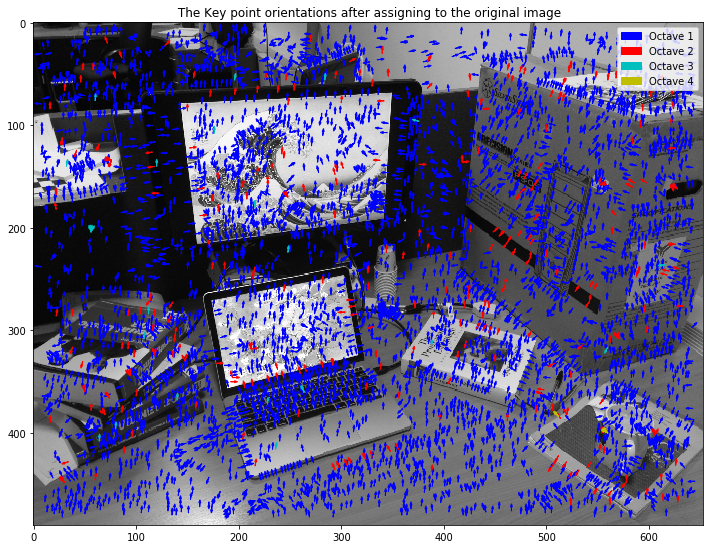

In [324]:
import math
plt.figure(figsize=(12,12))
plt.imshow(image_1,cmap='gray')
plt.title(' The Key point orientations after assigning to the original image')
for elem in orientation_final:
    if elem[1]!=1 and elem[1]!=4:
        if elem[0]==1:
            image = orientation_final[elem]
            for i in image:
                for j in range(len(image[i])):
                    angle = rd.uniform(image[i][j][0]*10,(image[i][j][0]+1)*10)
                    arrow1 = plt.arrow(x=i[1],y=i[0],dx = 4*math.cos(angle*math.pi/180),dy = 4*math.sin(angle*math.pi/180),head_width = 2,color ='b',label = 'Octave 1')
                    #plt.legend([arrow1,],['Octave 1'])
        if elem[0]==2:
            image = orientation_final[elem]
            for i in image:
                for j in range(len(image[i])):
                    angle = rd.uniform(image[i][j][0]*10,(image[i][j][0]+1)*10)
                    arrow2 = plt.arrow(x=2*i[1],y=2*i[0],dx = 4*math.cos(angle*math.pi/180),dy = 4*math.sin(angle*math.pi/180),head_width=2,color='r',label = 'Octave 2')
                    #plt.legend([arrow2,],['Octave 2'])
        if elem[0]==3:
            image = orientation_final[elem]
            for i in image:
                for j in range(len(image[i])):
                    angle = rd.uniform(image[i][j][0]*10,(image[i][j][0]+1)*10)
                    arrow3 = plt.arrow(x=4*i[1],y=4*i[0],dx = 4*math.cos(angle*math.pi/180),dy = 4*math.sin(angle*math.pi/180),head_width=2,color = 'c',label = 'Octave 3')
                    #plt.legend([arrow3,],['Octave 3'])
        if elem[0]==4:
            image = orientation_final[elem]
            for i in image:
                for j in range(len(image[i])):
                    angle = rd.uniform(image[i][j][0]*10,(image[i][j][0]+1)*10)
                    arrow4 = plt.arrow(x=8*i[1],y=8*i[0],dx = 4*math.cos(angle*math.pi/180),dy = 4*math.sin(angle*math.pi/180),head_width=2,color='y',label = 'Octave 4')
                    plt.legend([arrow1,arrow2,arrow3,arrow4],['Octave 1','Octave 2','Octave 3','Octave 4'])

In [294]:
(orientation_final[(3,2)])

{(14, 49): [[27, 3334.306684445437]],
 (14, 71): [[27, 1945.4510084640867]],
 (45, 54): [[26, 1168.4726187214792]],
 (71, 28): [[27, 1750.2992321286172]],
 (79, 97): [[27, 917.7044262835947]],
 (93, 57): [[27, 711.0857493685829]],
 (102, 16): [[27, 429.94588362615036]],
 (104, 59): [[27, 835.5770442973691]]}

In [353]:
del image_1

In [354]:
del image